In [3]:
import FinanceDataReader as fdr
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def findSymbol(company):
    datalist = fdr.StockListing('KRX') 
    companysymbol = datalist.loc[datalist.Name == company].values.tolist()
    comsymbol = companysymbol[0][0]
    return comsymbol

In [5]:
def getDatatoFinance(company, start, end):
    comsymbol = findSymbol(company)
    return fdr.DataReader(comsymbol, start, end )

In [6]:
def getDatatoPandas(company, start, end):
    comsymbol = findSymbol(company)
    comsymbol = comsymbol+".KS"
    return pdr.get_data_yahoo(comsymbol,start,end) 

In [9]:
findSymbol("현대차")

'005380'

### 단일 종목 계산 시 함수

In [166]:
def calculate(company):
    companydata = getDatatoFinance(company, '2017','2022-9-10')
    
    companyDayReturn = (companydata['Close'] / companydata['Close'].shift(1)).fillna(1) 
    companyCumulativeReturn = companyDayReturn.cumprod() 
    companyCagr = companyCumulativeReturn.iloc[-1] ** (252/len(companydata))
    companycumReturnMax = companyCumulativeReturn.cummax() 
    companyDd = (companyCumulativeReturn.cummax() - companyCumulativeReturn) / companyCumulativeReturn.cummax() * 100
    companyMdd = companyDd.max()
    return companycumReturnMax,companyCumulativeReturn, companyDd

In [167]:
def mdd(company):

IndentationError: expected an indented block (3357338766.py, line 1)

In [168]:
def graph_1(company):
    cumReturnMax,CumulativeReturn, Dd = calculate(company)
    
    print('='*45,f' [[ {company} 투자 성과 ]]','='*45 )

    # 시각화
    fig = plt.figure(figsize=(20,10))
    fig.set_facecolor('lightskyblue') 

    # 수익곡선
    plt.subplot(3, 1, 1)
    cumReturnMax.plot(color="blue")
    CumulativeReturn.plot(color="black")
    plt.ylabel("profit", fontsize=20)

    # 낙폭곡선
    plt.subplot(3, 1, 2)
    plt.plot(-Dd, color="red")
    plt.ylabel("draw down", fontsize=20)
    plt.show()

### 다 종목 계산 시 함수

In [169]:
def concatData(stocklist):
    finaldata = pd.DataFrame()
    for stock in stocklist:
        stockdata = getDatatoFinance(stock, '2017','2022-9-10')
        finaldata = pd.concat([finaldata,stockdata['Close']],axis=1)
    return finaldata


# 단일 종목 투자성과

In [171]:
graph_1("삼성전자")
graph_1("카카오")
graph_1("SK")
graph_1("NAVER")
graph_1("현대차")

TypeError: 'NoneType' object is not subscriptable

# 5개 종목 종가를 하나의 데이터 프레임으로 합치기

In [140]:
stocks = ["삼성전자", "카카오","SK","NAVER","현대차"]

data = concatData(stocks,krxlist)
data.columns = ["samsung", 'kakao','sk','naver', 'hyundai']

In [145]:
cumReturn = data / data.iloc[0] 
portWeight = [1/len(data.columns)] * len(data.columns) 
portCumReturn = (portWeight * cumReturn).sum(axis=1) 
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)  

portfolio
cagr: 1.1274700802247333
mdd: 49.32383184035618


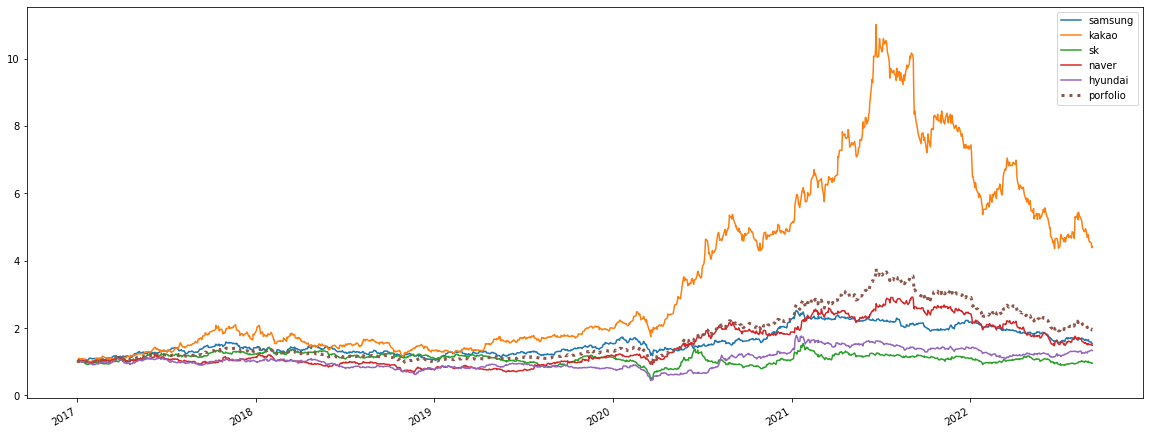

In [146]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")  

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()

# DD 그림 그리기